# Stock Market Prediction-Microsoft

## Importing libraries

In [97]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
df=pd.read_csv('MSFT.csv')

In [136]:
df.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
9192,2022-08-31,265.390015,267.109985,261.329987,261.470001,260.735199,24791800
9193,2022-09-01,258.869995,260.890015,255.410004,260.399994,259.668213,23263400
9194,2022-09-02,261.700012,264.739990,254.470001,256.059998,255.340408,22855400
9195,2022-09-06,256.200012,257.829987,251.940002,253.250000,252.538300,21328200
9196,2022-09-07,254.699997,258.829987,253.220001,258.089996,257.364716,24126700
9197,2022-09-08,257.510010,260.429993,254.789993,258.519989,257.793488,20319900
9198,2022-09-09,260.500000,265.230011,260.290009,264.459991,263.716797,22084700
9199,2022-09-12,265.779999,267.450012,265.160004,266.649994,265.900635,18747700
9200,2022-09-13,258.839996,260.399994,251.589996,251.990005,251.281860,33353300
9201,2022-09-14,253.529999,254.229996,249.860001,252.220001,251.511200,23913000


In [100]:
df.shape

(9252, 7)

## visualization on closing data of Microsoft

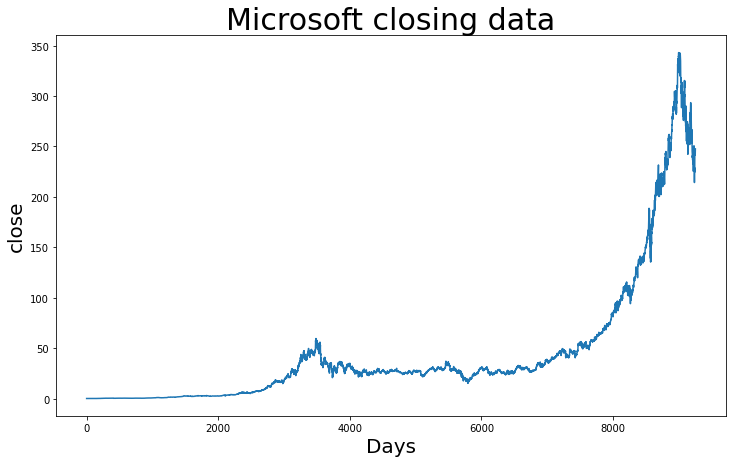

In [101]:
plt.figure(figsize=(12,7))
plt.title('Microsoft closing data',fontsize=30)
plt.xlabel('Days',fontsize=20)
plt.ylabel("close",fontsize=20)
plt.plot(df['Close'])
plt.show()

In [102]:
df=df[['Close']]

In [103]:
df.head()

,Close
0,0.097222
1,0.100694
2,0.102431
3,0.099826
4,0.098090


#### Filtering the Close data into data

In [104]:
data=df.filter(['Close'])

#### Converting to numpy array

In [105]:
dataset=data.values

In [106]:
dataset

array([[9.72220000e-02],
       [1.00694000e-01],
       [1.02431000e-01],
       ...,
       [2.42050003e+02],
       [2.45029999e+02],
       [2.47580002e+02]])

#### Fixing training rows 

In [107]:
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

7402

## Scailing

In [108]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [109]:
scaled_data

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       ...,
       [7.05381411e-01],
       [7.14068947e-01],
       [7.21502931e-01]])

In [110]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([2.02437349e-05, 3.03656023e-05, 3.54294513e-05, 2.78351354e-05,
       2.27742017e-05, 1.51828011e-05, 7.59140057e-06, 0.00000000e+00,
       5.06093371e-06, 1.26523343e-05, 1.77132680e-05, 1.51828011e-05,
       1.26523343e-05, 1.51828011e-05, 1.77132680e-05, 1.77132680e-05,
       1.26523343e-05, 1.51828011e-05, 2.02437349e-05, 2.27742017e-05,
       2.78351354e-05, 3.03656023e-05, 3.03656023e-05, 4.04903850e-05,
       4.30208519e-05, 3.28989844e-05, 3.28989844e-05, 2.78351354e-05,
       2.91003689e-05, 5.82036530e-05, 7.84503031e-05, 8.09807700e-05,
       7.08559873e-05, 6.32645867e-05, 5.82036530e-05, 5.82036530e-05,
       5.56731861e-05, 5.82036530e-05, 5.82036530e-05, 6.07341199e-05,
       5.82036530e-05, 6.07341199e-05, 6.32645867e-05, 6.07341199e-05,
       6.07341199e-05, 6.32645867e-05, 5.82036530e-05, 5.56731861e-05,
       5.06122524e-05, 5.06122524e-05, 5.06122524e-05, 6.07341199e-05,
       7.08559873e-05, 7.84503031e-05, 9.11026374e-05, 8.09807700e-05,
     

In [111]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [112]:
x_train.shape

(7342, 60)

In [113]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(7342, 60, 1)

In [114]:
model=Sequential() 
model.add(LSTM(80,return_sequences=True,input_shape=(x_train.shape[1],1)))     
model.add(LSTM(80,return_sequences=False)) 

In [115]:
model.add(Dense(25))
model.add(Dense(1))

In [116]:
model.compile(optimizer='adam',loss='MSE')

In [117]:
model.fit(x_train,y_train,batch_size=20,epochs=20)

Epoch 1/20
368/368 [==============================] - 48s 84ms/step - loss: 7.0524e-05
Epoch 2/20
368/368 [==============================] - 30s 83ms/step - loss: 1.1669e-05
Epoch 3/20
368/368 [==============================] - 30s 82ms/step - loss: 9.7141e-06
Epoch 4/20
368/368 [==============================] - 30s 82ms/step - loss: 1.0875e-05
Epoch 5/20
368/368 [==============================] - 31s 85ms/step - loss: 7.6008e-06
Epoch 6/20
368/368 [==============================] - 31s 83ms/step - loss: 8.3552e-06
Epoch 7/20
368/368 [==============================] - 31s 83ms/step - loss: 7.2763e-06
Epoch 8/20
368/368 [==============================] - 31s 85ms/step - loss: 6.6941e-06
Epoch 9/20
368/368 [==============================] - 31s 84ms/step - loss: 7.3143e-06
Epoch 10/20
368/368 [==============================] - 31s 83ms/step - loss: 5.0629e-06
Epoch 11/20
368/368 [==============================] - 31s 83ms/step - loss: 4.8272e-06
Epoch 12/20
368/368 [====================

In [118]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [119]:
x_test=np.array(x_test)

In [120]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [121]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

58/58 [==============================] - 6s 61ms/step


In [122]:
predictions

array([[ 44.94406 ],
       [ 45.305958],
       [ 45.22524 ],
       ...,
       [234.24825 ],
       [235.0798  ],
       [237.96791 ]], dtype=float32)

### RMSE

In [123]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.989934862535896

In [124]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

C:\Users\user\AppData\Local\Temp\ipykernel_6604\3121654489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


In [125]:
valid['Predictions']

7402     44.944061
7403     45.305958
7404     45.225239
7405     44.703121
7406     44.647083
           ...    
9247    234.485352
9248    234.556931
9249    234.248245
9250    235.079803
9251    237.967911
Name: Predictions, Length: 1850, dtype: float32

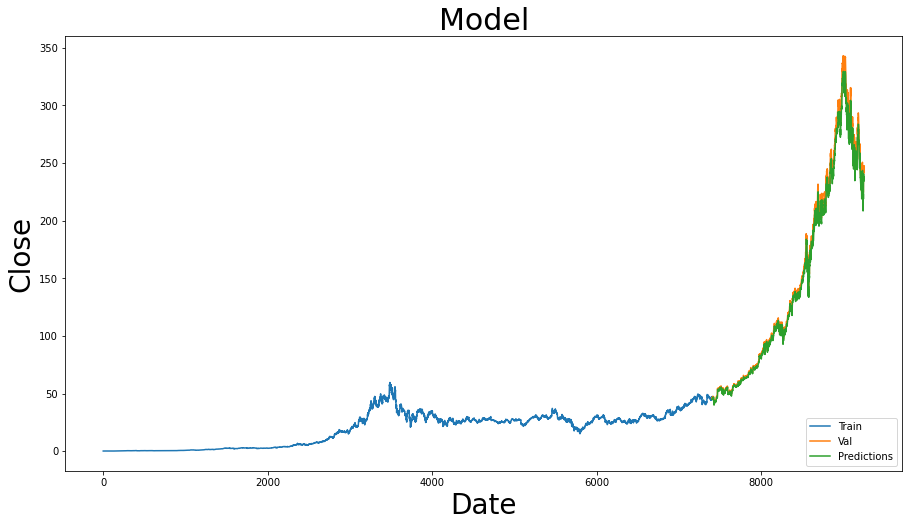

In [126]:
plt.figure(figsize=(15,8))
plt.title('Model',fontsize=30)
plt.xlabel('Date',fontsize=28)
plt.ylabel('Close',fontsize=28)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [127]:
valid.head(20)

,Close,Predictions
7402,46.110001,44.944061
7403,45.939999,45.305958
7404,45.349998,45.225239
7405,45.340000,44.703121
7406,46.290001,44.647083
7407,46.880001,45.511230
7408,46.700001,46.133083
7409,46.810001,46.005665
7410,47.540001,46.058022
7411,47.580002,46.709953


In [141]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9247,2022-11-17,237.779999,243.250000,237.630005,241.679993,241.679993,23123500
9248,2022-11-18,243.509995,243.740005,239.029999,241.220001,241.220001,27591800
9249,2022-11-21,241.429993,244.669998,241.190002,242.050003,242.050003,26394700
9250,2022-11-22,243.589996,245.309998,240.710007,245.029999,245.029999,19665700
9251,2022-11-23,245.110001,248.279999,244.270004,247.580002,247.580002,19489500


In [143]:
micro=pd.read_csv('MSFT.csv')
new_df=micro.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 56ms/step
[[240.51501]]


In [139]:
micro2=pd.read_csv('MSFT.csv',df['2022-09-08'])

KeyError: '2022-09-08'